# Análise de uma Base de Dados de Veículos Elétricos

**Importando bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importando base de dados**

In [2]:
data = pd.read_csv("C:/Users/profg/Downloads/Electric_Vehicle_Population_Data.csv")
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


**Analisando informações gerais dos dados**

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

**Selecionando colunas com dados categóricos**

In [3]:
categoricos = data.columns[data.dtypes == 'object']
categoricos

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')

**Selecionando colunas com dados numéricos**

In [4]:
numericos = data.columns[data.dtypes != 'object']
numericos

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')

**Excluindo linhas que apresentam dados faltantes**

In [5]:
data.dropna(inplace = True)

In [6]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

**Criando gráfico dos 20 modelos mais fabricados**

In [54]:
modelos = list(data['Model'].value_counts().head(20).index.values)
quantidade = list(data['Model'].value_counts().head(20).values)

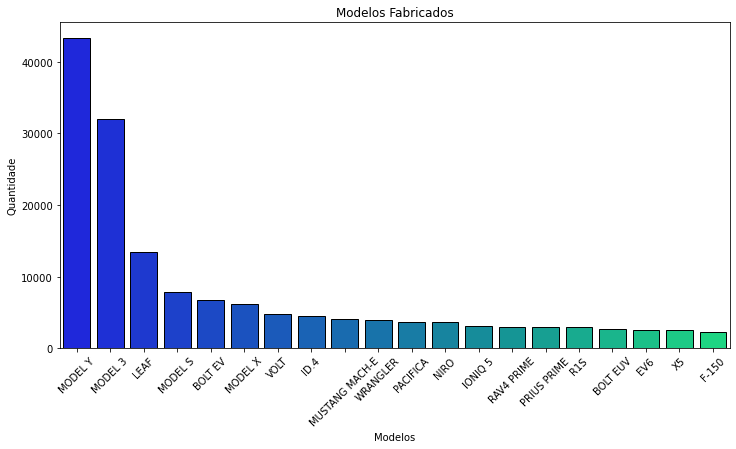

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(x = modelos, y = quantidade, edgecolor='k', palette='winter')
plt.xticks(rotation=45)
plt.title('Modelos Fabricados')
plt.xlabel('Modelos')
plt.ylabel('Quantidade')
plt.show()

**Criando gráfico das 10 cidades com mais veículos produzidos**

In [162]:
cidades = list(data['City'].value_counts().head(10).index.values)
qtd = list(data['City'].value_counts().head(10).values)

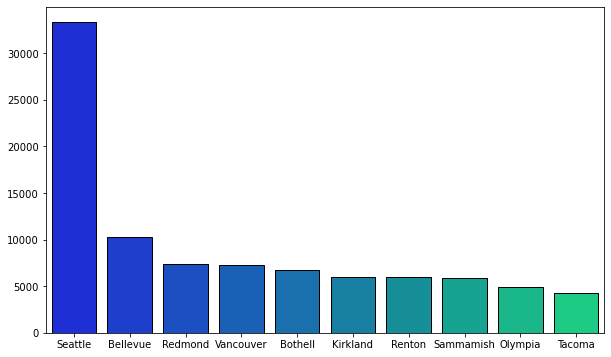

In [166]:
plt.figure(figsize=(10,6))
sns.barplot(x=cidades, y=qtd, edgecolor='k', palette='winter')
plt.show()

**Em Seattle, quais os modelos mais produzidos?**

In [130]:
seattle = data[data['City'] == 'Seattle']

In [142]:
models_seattle = seattle['Model'].value_counts()

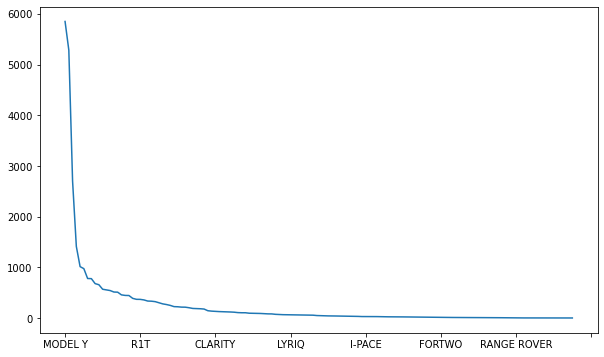

In [144]:
models_seattle.plot(figsize=(10,6));

**Fabricantes com maior número de carros produzidos**

In [96]:
marcas = list(data['Make'].value_counts().head(15).index.values)
qtd2 = list(data['Make'].value_counts().head(15).values)

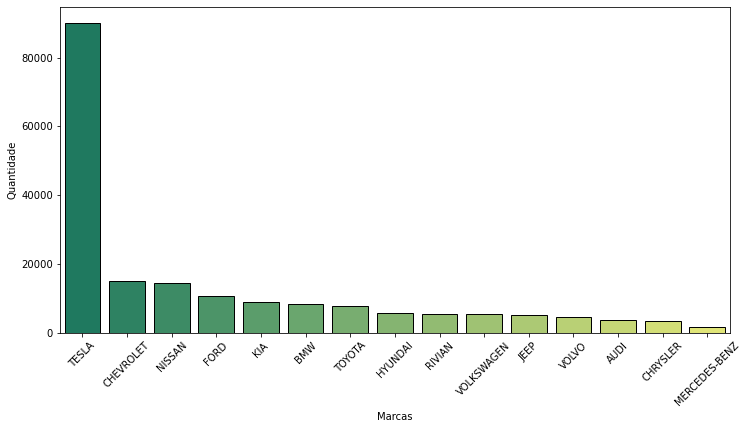

In [108]:
plt.figure(figsize=(12,6))
sns.barplot(x = marcas, y = qtd2, edgecolor='k', palette='summer')
plt.xticks(rotation=45)
plt.xlabel('Marcas')
plt.ylabel('Quantidade')
plt.show()

**Qual a quantidade de modelos produzidos pela Tesla?**

In [122]:
tesla = data[data['Make'] == 'Tesla']

In [123]:
model_tesla = toyota['Model'].value_counts()
model_tesla

RAV4 PRIME       3042
PRIUS PRIME      3026
PRIUS PLUG-IN     942
BZ4X              858
RAV4               52
Name: Model, dtype: int64

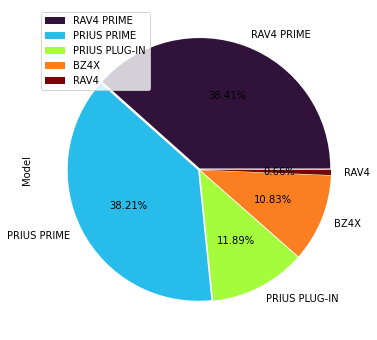

In [128]:
model_tesla.plot(kind='pie', figsize=(12,6), autopct='%1.2f%%', subplots=True, colormap='turbo', 
                    explode=[0.01, 0.01, 0.01, 0.01, 0.01])
plt.legend(loc='upper left')
plt.show()